In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
info = pd.read_csv('heroes_information.csv')
powers = pd.read_csv('super_hero_powers.csv')

In [5]:
info.sample()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
358,358,Jesse Quick,Female,-,Human,-,-99.0,DC Comics,-,good,-99.0


In [6]:
powers.sample()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
632,Venom II,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
print(info.shape)
print(powers.shape)

(734, 11)
(667, 168)


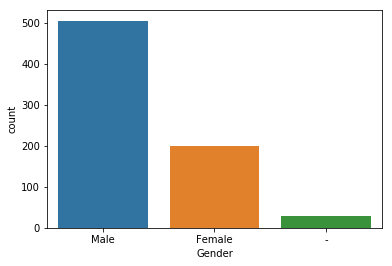

In [27]:
sns.countplot(x='Gender', data=info)
plt.show()

As expected, most of the superheroes are male.

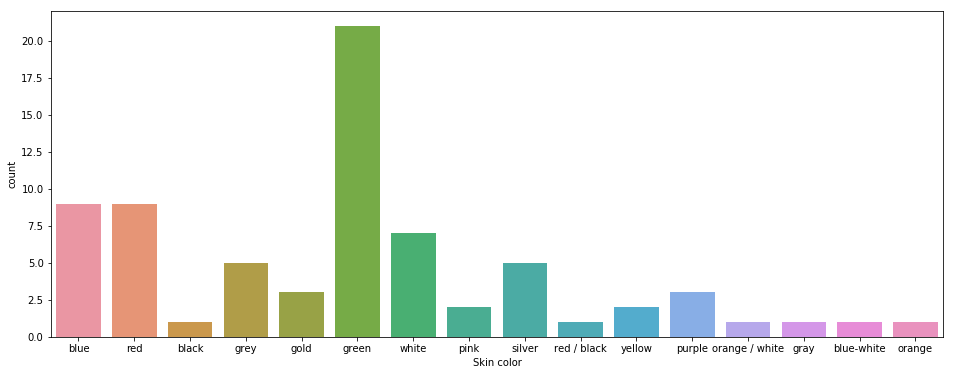

In [36]:
plt.subplots(figsize=(16,6))
skin = info[info['Skin color'] != '-']
sns.countplot(x='Skin color', data = skin)

Green seems to be the favt. color of artists to give to their superheroes. Also, we have very few black superheroes.

In [37]:
info.sample()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
105,105,Black Panther,Male,brown,Human,Black,183.0,Marvel Comics,-,good,90.0


The dataset seems flawed for this matter since it doesn't have skin color even of 'BLACK' Panther.

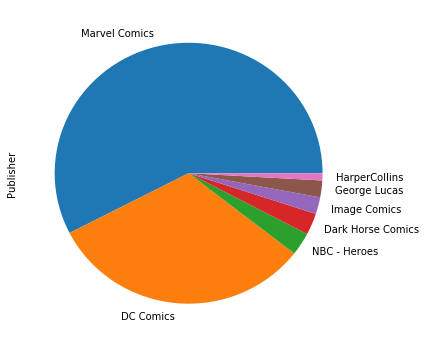

In [47]:
info['Publisher'].value_counts()[:7].plot(kind='pie', figsize=(6,6))

In [48]:
powers.sample()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
162,Colossus,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
powers.replace(to_replace=[True, False], value=[1,0], inplace=True)

In [124]:
powers.sample()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
435,Mysterio,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [153]:
powers.loc[:, 'no_of_powers'] = powers.iloc[:, 1:].sum(axis=1)

In [155]:
powers=powers.sort_values(by='no_of_powers', ascending=False)

In [156]:
powers[['hero_names', 'no_of_powers']][:10]

,hero_names,no_of_powers
563,Spectre,98
18,Amazo,88
394,Martian Manhunter,70
370,Living Tribunal,70
388,Man of Miracles,68
139,Captain Marvel,66
597,T-X,66
246,Galactus,64
594,T-1000,64
420,Mister Mxyzptlk,62


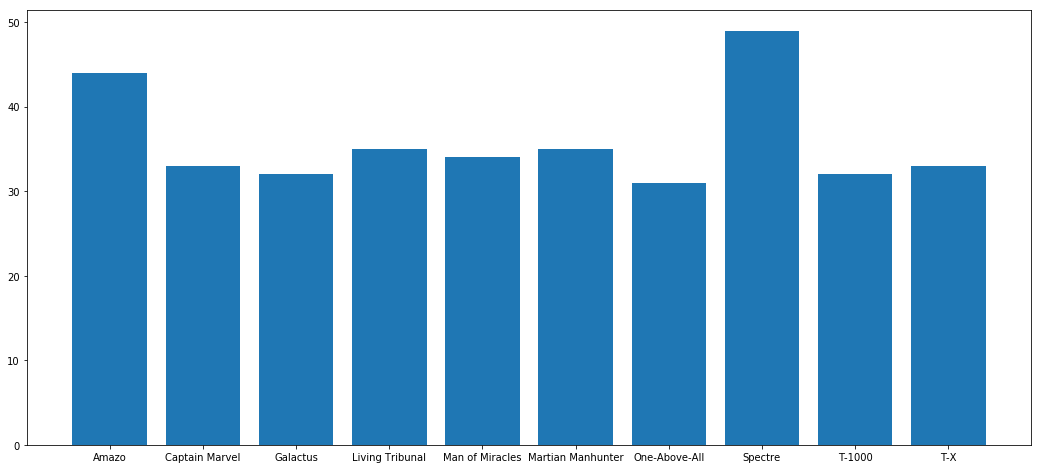

In [148]:
plt.bar(x = powers['hero_names'][:10], height=powers['no_of_powers'][:10] )
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8